In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
output = open("experiment1.txt", "r").read()
lines = output.split("\n")

current_degree = 20
precisions = {}
times = {}

precisions[current_degree] = []
times[current_degree] = []

for line in lines:
    if "done" in line:         #Degree X done
        current_degree += 1
        precisions[current_degree] = []
        times[current_degree] = []
    if "Precision bits" in line and len(precisions[current_degree]) < 3:
        precisions[current_degree].append(float((line)[16:]))
    if "The evaluation of" in line and len(times[current_degree]) < 3:
        times[current_degree].append(float((line)[39:45].replace(":", ".").replace("s", "").replace(",", "")))

precisions.pop(current_degree)
times.pop(current_degree)

df_times = pd.DataFrame(times)
df_precisions = pd.DataFrame(precisions)

In [13]:
precisions

{20: [7.1855, 7.6817, 7.0057],
 21: [6.2209, 5.0547, 5.0049],
 22: [8.3959, 7.0053, 7.3423],
 23: [6.0985, 7.2071, 6.4149],
 24: [7.0853, 6.9058, 7.3696],
 25: [8.1694, 7.4252, 7.4568],
 26: [7.4662, 6.8252, 7.9665],
 27: [7.5911, 6.4206, 7.603],
 28: [9.3275, 7.9061, 7.8218],
 29: [7.2353, 6.9507, 6.4777],
 30: [8.3464, 8.641, 8.4418],
 31: [7.4507, 6.0738, 6.7368],
 32: [9.9552, 9.974, 8.8747],
 33: [8.2107, 7.2786, 6.8012],
 34: [10.4699, 9.795, 10.2988],
 35: [7.9535, 6.8093, 7.9869],
 36: [10.3267, 10.9295, 11.2157],
 37: [7.2703, 7.4416, 7.3608],
 38: [11.22, 10.3607, 11.1174],
 39: [7.6574, 7.1842, 6.5234],
 40: [10.6357, 10.9568, 10.439],
 41: [6.7221, 7.3639, 6.9602],
 42: [9.6551, 10.6472, 9.7937],
 43: [6.9971, 7.2925, 7.412],
 44: [9.9524, 11.0828, 9.3749],
 45: [7.4375, 7.4785, 7.4507],
 46: [9.232, 9.1544, 10.3435],
 47: [8.0117, 8.9835, 8.4696],
 48: [9.8282, 9.7001, 9.4771],
 49: [11.4128, 10.4634, 11.1722],
 50: [9.2702, 10.3715, 9.5753],
 51: [9.7365, 9.6709, 9.3941],

In [14]:
df_precisions

,20,21,22,23,24,25,26,27,28,29,...,81,82,83,84,85,86,87,88,89,90
0,7.1855,6.2209,8.3959,6.0985,7.0853,8.1694,7.4662,7.5911,9.3275,7.2353,...,10.5788,12.5816,11.5425,12.7367,9.6196,13.0934,10.6525,13.5016,9.0932,13.4118
1,7.6817,5.0547,7.0053,7.2071,6.9058,7.4252,6.8252,6.4206,7.9061,6.9507,...,9.5680,12.7223,9.4590,12.5872,10.5810,13.4372,9.5154,15.0677,8.9447,13.0731
2,7.0057,5.0049,7.3423,6.4149,7.3696,7.4568,7.9665,7.6030,7.8218,6.4777,...,10.3271,12.1454,9.6120,12.7526,9.7708,12.6851,10.5917,13.6670,10.1629,13.9818


Text(0, 0.5, 'Precision bits')

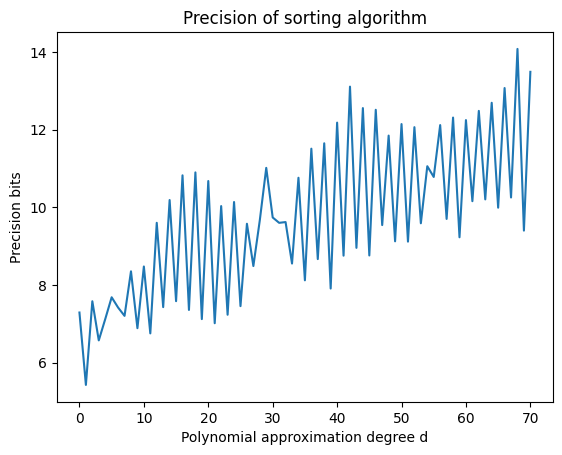

In [15]:
mean_precisions = []
for degree in times.keys():
    mean_precisions.append(df_precisions.loc[:, degree].mean())
plt.title("Precision of sorting algorithm")
plt.plot(mean_precisions)
plt.xlabel('Polynomial approximation degree d')
plt.ylabel('Precision bits') 

In [16]:
df_times

,20,21,22,23,24,25,26,27,28,29,...,81,82,83,84,85,86,87,88,89,90
0,21.433,22.775,22.292,22.731,23.704,23.502,22.104,22.753,23.845,22.111,...,27.291,27.818,28.561,27.454,27.452,27.592,27.533,27.832,27.336,27.989
1,22.556,23.600,23.574,22.976,23.170,23.392,27.317,22.798,23.450,24.500,...,27.741,27.849,27.332,27.540,27.670,26.908,28.120,28.400,27.567,27.868
2,24.300,22.957,22.816,24.235,24.400,22.326,23.195,23.754,23.389,24.963,...,27.339,26.814,31.461,27.824,26.687,27.149,27.375,27.790,27.225,27.825


Text(0, 0.5, 'Time (s)')

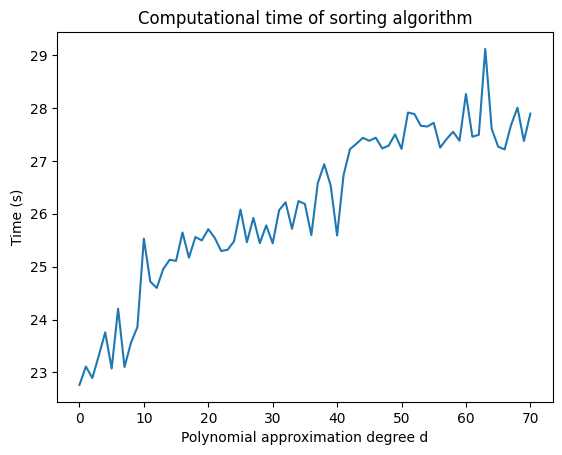

In [17]:
mean_times = []
for degree in times.keys():
    mean_times.append(df_times.loc[:, degree].mean())
plt.title("Computational time of sorting algorithm")
plt.plot(mean_times)
plt.xlabel('Polynomial approximation degree d')
plt.ylabel('Time (s)') 

In [18]:
for i in range(len(mean_times)):
    print("({}, {})".format(i + 20, mean_times[i]))

(20, 22.763)
(21, 23.110666666666663)
(22, 22.894000000000002)
(23, 23.314000000000004)
(24, 23.758)
(25, 23.073333333333334)
(26, 24.205333333333332)
(27, 23.10166666666667)
(28, 23.561333333333334)
(29, 23.858000000000004)
(30, 25.529333333333337)
(31, 24.715333333333334)
(32, 24.59766666666667)
(33, 24.952)
(34, 25.12966666666667)
(35, 25.109333333333336)
(36, 25.64633333333333)
(37, 25.169999999999998)
(38, 25.560333333333332)
(39, 25.496)
(40, 25.708666666666662)
(41, 25.544999999999998)
(42, 25.295666666666666)
(43, 25.31866666666667)
(44, 25.47966666666667)
(45, 26.079333333333334)
(46, 25.463666666666665)
(47, 25.921333333333337)
(48, 25.44366666666667)
(49, 25.780666666666665)
(50, 25.44066666666667)
(51, 26.068)
(52, 26.217666666666663)
(53, 25.715)
(54, 26.23966666666667)
(55, 26.186666666666667)
(56, 25.59766666666667)
(57, 26.580333333333332)
(58, 26.93766666666667)
(59, 26.536)
(60, 25.589)
(61, 26.732)
(62, 27.221999999999998)
(63, 27.326000000000004)
(64, 27.43599999999

Degree with the best ratio: 68


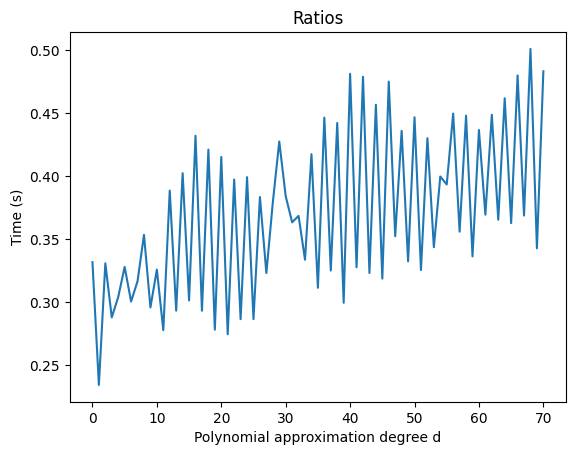

In [11]:
ratios = []
for i in range(len(mean_times)):
    ratios.append(mean_precisions[i] / mean_times[i])
plt.title("Ratios")
plt.plot(ratios)
plt.xlabel('Polynomial approximation degree d')
plt.ylabel('Time (s)') 

print("Degree with the best ratio: {}".format(ratios.index(max(ratios))))